# Rutas.

In [0]:
from google.colab import drive # Para poder cargar los archivos que se encuentran en google drive
import os

drive.mount('/content/drive')

pfc_datos_google_drive_ruta = '/content/drive/My Drive/FICH/Proyecto Final de Carrera (PFC)/Código'
# pfc_datos_google_drive_ruta = '/content/drive/My Drive/Proyecto Final de Carrera (PFC)/Código'

# print(pfc_datos_google_drive_ruta)
# x_entrenamiento_ruta = os.path.join(pfc_datos_google_drive_ruta, "x_entrenamiento_pre.pickle")
# y_entrenamiento_ruta = os.path.join(pfc_datos_google_drive_ruta, "y_entrenamiento_pre.pickle")
# x_prueba_ruta = os.path.join(pfc_datos_google_drive_ruta, "x_prueba_pre.pickle")
# y_prueba_ruta = os.path.join(pfc_datos_google_drive_ruta, "y_prueba_pre.pickle")

# x_entrenamiento_ruta = os.path.join(pfc_datos_google_drive_ruta, "x_entrenamiento_post_consin_7500_c9.pickle")
# y_entrenamiento_ruta = os.path.join(pfc_datos_google_drive_ruta, "y_entrenamiento_post_consin_7500_c9.pickle")
# x_prueba_ruta = os.path.join(pfc_datos_google_drive_ruta, "x_prueba_post_consin_7500_c9.pickle")
# y_prueba_ruta = os.path.join(pfc_datos_google_drive_ruta, "y_prueba_post_consin_7500_c9.pickle")

longitud = 10000
#cantidad_ejemplos_sin_interaccion = 1048

x_entrenamiento_ruta = os.path.join(pfc_datos_google_drive_ruta, "x_entrenamiento_l{}.pickle".format(longitud))
y_entrenamiento_ruta = os.path.join(pfc_datos_google_drive_ruta, "y_entrenamiento_l{}.pickle".format(longitud))
x_prueba_ruta = os.path.join(pfc_datos_google_drive_ruta, "x_prueba_l{}.pickle".format(longitud))
y_prueba_ruta = os.path.join(pfc_datos_google_drive_ruta, "y_prueba_l{}.pickle".format(longitud))

vocabulario_ruta = os.path.join(pfc_datos_google_drive_ruta, "vocabulario.pickle")
matriz_embeddings_ruta = os.path.join(pfc_datos_google_drive_ruta, "matriz_embeddings50.pickle")
secuencias_ruta = os.path.join(pfc_datos_google_drive_ruta, "secuencias_dict.pickle")
interacciones_lista_ruta = os.path.join(pfc_datos_google_drive_ruta, "interacciones_lista.txt")
etiquetas_neural_networks_ruta = os.path.join(pfc_datos_google_drive_ruta, "etiquetas_neural_networks_entrenamiento.csv")
etiquetas_neural_networks_prueba_ruta = os.path.join(pfc_datos_google_drive_ruta, "etiquetas_neural_networks_prueba.csv")
publicaciones_directorio = os.path.join(pfc_datos_google_drive_ruta, "replaced4")

# cnn
modelo_arquitectura_ruta = os.path.join(pfc_datos_google_drive_ruta, "modelo_cnn_arquitectura.png")
modelo_guardado_ruta = os.path.join(pfc_datos_google_drive_ruta, "mejor_modelo_cnn_{}.h5")

# rnn
modelo_rnn_guardado_ruta = os.path.join(pfc_datos_google_drive_ruta, "mejor_modelo_rnn_{}.h5")
modelo_rnn_arquitectura_ruta = os.path.join(pfc_datos_google_drive_ruta, "modelo_rnn_arquitectura.png")


# etiquetas_neural_networks_ruta = os.path.join(pfc_datos_google_drive_ruta, "etiquetas_neural_networks_4_v3.csv")

# print(os.listdir('/content/drive/My Drive'))

print("Rutas listas.")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
Rutas listas.


# Funciones auxiliares.

In [0]:
import csv
import random
from collections import Counter
import matplotlib.pyplot as pplt


def histograma(secuencias, secuencia_gen, secuencia_droga):
    tot = 32000
    posiciones_genes = []
    posiciones_drogas = []
    for ejemplo in secuencias:
        for p, elemento in enumerate(ejemplo):
            if elemento == secuencia_gen:
                if p < tot:
                    posiciones_genes.append(p)
            if elemento == secuencia_droga:
                if p < tot:
                    posiciones_drogas.append(p)
    pplt.figure()
    pplt.subplot(2,1,1)
    pplt.hist(posiciones_genes, bins=150)
    pplt.legend()

    pplt.subplot(2,1,2)
    pplt.hist(posiciones_drogas, bins=150)
    pplt.legend()

    historgama_ruta = os.path.join(pfc_datos_google_drive_ruta, "histograma.png")
    pplt.savefig(historgama_ruta)
    pplt.show()    
    

def cargar_interacciones(in_file):
    """Carga la lista de interacciones del archivo."""
    with open(in_file, encoding="utf8") as f:
        res = [l.strip() for l in f.readlines()]
    return res


def cargar_ifg(etiquetas_archivo_ruta):
    """Carga las etiquetas a usar como ejemplos."""
    interacciones_lista = []
    with open(etiquetas_archivo_ruta, encoding="utf8") as etiquetas:
        lector_csv = csv.reader(etiquetas)
        for linea in lector_csv:
            interacciones_lista.append(linea)
    return interacciones_lista


def cargar_publicaciones():
    # Se cargan las publicaciones en un diccionario: publicaciones_dict[pmid] = contenido
    print("Cargando diccionario de publicaciones...")
    publicaciones_dict = dict()
    publicaciones_en_directorio = os.listdir(publicaciones_directorio)
    tot = len(publicaciones_en_directorio)
    print("Cantidad de archivos:", tot)
    for i, archivo in enumerate(publicaciones_en_directorio):
        pmid = archivo.stem
        print("Leyendo {}/{}".format(i, tot))
        with open(archivo, encoding="utf8") as publicacion:
            texto = publicacion.read()
            publicaciones_dict[pmid] = texto
    print("Diccionario de publicaciones cargado.")
    return publicaciones_dict


def generar_pesos_clases(y):
    """Genera los pesos para las clases según aparezcan en los datos de entrenamiento."""
    
    cc = Counter(y)
    print("Cantidad sin interacción:", cc["sin_interaccion"])
    print("Cantidad inhibitor:", cc["inhibitor"])

    yun = np.unique(y)
    pesos_clases = compute_class_weight("balanced", yun, y)

    pesos = dict(zip(yun, pesos_clases))
    print(pesos)
    interacciones_pesos_dict = {}
    for i, interaccion in enumerate(interacciones):
        interacciones_pesos_dict[i] = pesos[interaccion]
    return interacciones_pesos_dict

print("Listo funciones.")

Listo funciones.


# Generación de secuencias de ejemplos.

In [0]:
import os
import numpy as np
import csv
import random
import math
from keras.preprocessing import text, sequence
from keras.utils import np_utils
import pickle
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
import h5py


"""
CONFIGURAR PARA LA CREACIÓN DE EJEMPLOS. Los archivos guardados
son las secuencias para los ejemplos del archivo de etiquetas con
el gen y droga de interés marcados en X, y las interacciones según
el archivo de interacciones en Y de forma one-hot encoded.
"""

vocabulario_bool = False
embeddings_bool = False
dimension_embedding = 100
secuencias_bool = False
padtrunc_where = "post"
guardar_archivos = True


def marcar_entidad_en_secuencia(secuencia_lista,
                                vocabulario,
                                etiquetas,
                                secuencia_gen, secuencia_droga):
    """Pone el número de secuencia correspondiente al gen o droga de interés en la secuencia de cada ejemplo."""

    for i in range(0, len(secuencia_lista), 1):
        print("Procesando el ejemplo: {}/{}".format(i+1,len(secuencia_lista)))
        # No hace más falta llamar al compactar, este algoritmo ya evita que queden repetidos secuenciales
        ejemplo = secuencia_lista[i]
        gen = etiquetas[i][1]
        droga = etiquetas[i][2]

        ejemplo_reducido = list()
        for elemento in ejemplo:
            palabra = vocabulario.index_word[elemento]
            if palabra.startswith("xxx") and palabra.endswith("xxx"):
                if palabra == "xxx{}xxx".format(gen):
                    elemento = secuencia_gen
                elif palabra == "xxx{}xxx".format(droga):
                    elemento = secuencia_droga
                else:
                    elemento = 0 # anulo todos los otros
            ejemplo_reducido.append(elemento)

        secuencia_lista[i] = ejemplo_reducido

    return secuencia_lista


def crear_ejemplos(etiquetas_ruta,
                   maxima_longitud_ejemplos,
                   vocabulario_bool,
                   embeddings_bool,
                   secuencias_bool,
                   dimension_embedding,
                   salida_x, salida_y,
                   padtrunc_where="post",
                   guardar=False):

    publicaciones_dict = {}
    ''' Vocabulario '''
    if vocabulario_bool: # Generar el vocabulario
        publicaciones_dict = cargar_publicaciones()
        # Se genera el vocabulario
        print("Generando vocabulario...")
        vocabulario = text.Tokenizer()
        vocabulario.fit_on_texts(publicaciones_dict.values())

        with open(vocabulario_ruta, "wb") as handle: # Guardar vocabulario en disco
            pickle.dump(vocabulario, handle, protocol=pickle.HIGHEST_PROTOCOL)

        print("Vocabulario generado.")

    else: # Cargar vocabulario pre-guardado
        with open(vocabulario_ruta, "rb") as handle: # Cargar vocabulario desde el disco
            vocabulario = pickle.load(handle)
        print("Vocabulario pre-guardado cargado.")
        
    # información de gen y droga:
    top_palabras_frecuentes = len(vocabulario.word_index)
    print("Cantidad palabras:", top_palabras_frecuentes)
    print("Máxima:", max(vocabulario.word_index.values()))

    secuencia_gen = top_palabras_frecuentes + 1
    vocabulario.index_word[secuencia_gen] = "<GEN>"
    vocabulario.word_index["<GEN>"] = secuencia_gen
    secuencia_droga = top_palabras_frecuentes + 2
    vocabulario.index_word[secuencia_droga] = "<DROGA>"
    vocabulario.word_index["<DROGA>"] = secuencia_droga
    top_palabras_frecuentes += 2

    print("Con marcadores de gen y droga:", len(vocabulario.word_index), len(vocabulario.index_word))


    ''' Embeddings '''
    if embeddings_bool: # Generar vectores de embedding
        print("Generando diccionario de embeddings...")
        embeddings_dict = dict()
        palabras_lista = list(vocabulario.word_index.keys())
        modelo_word2vec = Word2Vec([palabras_lista], size=dimension_embedding, min_count=1)

        gen_emb = np.zeros((1, dimension_embedding+2))
        gen_emb[0, dimension_embedding] = 1
        droga_emb = np.zeros((1, dimension_embedding+2))
        droga_emb[0, dimension_embedding+1] = 1
        for palabra, secuencia in vocabulario.word_index.items():
            if palabra == "<GEN>":
                embeddings_dict[palabra] = gen_emb
            elif palabra == "<DROGA>":
                embeddings_dict[palabra] = droga_emb
            else:
                embeddings_dict[palabra] = list(modelo_word2vec.wv[palabra]) + [0, 0]
        
        matriz_embeddings = np.zeros((len(vocabulario.word_index)+1, dimension_embedding+2))
        for i, palabra in enumerate(vocabulario.word_index.keys()):
            matriz_embeddings[i+1] = embeddings_dict[palabra]

        with open(matriz_embeddings_ruta, "wb") as handle:
            pickle.dump(matriz_embeddings, handle, protocol=pickle.HIGHEST_PROTOCOL)
        print("Diccionario de embeddings generado.")

    else: # Cargar vectores de embedding pre-guardados
        with open(matriz_embeddings_ruta, "rb") as handle:
            matriz_embeddings = pickle.load(handle)
        print("Embeddings pre-guardados cargados.")


    ''' Secuencias '''
    secuencias_dict = dict()
    if secuencias_bool: # Generar secuencias
        # Se convierten los ejemplos en secuencias de números
        print("Generando secuencias...")
        publicaciones_lista = list()
        publicaciones_pmids = list()
        if not publicaciones_dict:
            publicaciones_dict = cargar_publicaciones()
        for pmid, contenido in publicaciones_dict.items():
            publicaciones_pmids.append(pmid)
            publicaciones_lista.append(contenido)
        secuencias_lista = vocabulario.texts_to_sequences(publicaciones_lista)
        for i in range(0, len(publicaciones_pmids), 1):
            secuencias_dict[publicaciones_pmids[i]] = secuencias_lista[i]
        with open(secuencias_ruta, "wb") as handle: # Guardar vocabulario en disco
            pickle.dump(secuencias_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
        print("Secuencias generadas.")
    else: # Cargar secuencias pre-guardadas
        with open(secuencias_ruta, "rb") as handle: # Cargar vocabulario desde el disco
            secuencias_dict = pickle.load(handle)
        print("Secuencias pre-guardadas cargadas.")


    # generar ejemplo por ejemplo:
    if guardar:

        ifg_entrenamiento = cargar_ifg(etiquetas_ruta)

        print("Generando listas de ejemplos.")
        ejemplos_secuencias = []
        y = []
        for ifg in ifg_entrenamiento:
            secuencia = secuencias_dict[ifg[0]]
            ejemplos_secuencias.append(secuencia)
            y.append(ifg[3])
        print("Listas de ejemplos generadas ({}).".format(len(ejemplos_secuencias)))

        # Se ajustan las secuencias a la longitud deseada
        ejemplos_secuencias = marcar_entidad_en_secuencia(ejemplos_secuencias,
                                                            vocabulario,
                                                            ifg_entrenamiento,
                                                            secuencia_gen, secuencia_droga)

        ejemplos_secuencias = np.asarray(ejemplos_secuencias)

        histograma(ejemplos_secuencias, secuencia_gen, secuencia_droga)

        x_train = sequence.pad_sequences(sequences=ejemplos_secuencias,
                                        maxlen=maxima_longitud_ejemplos,
                                        padding=padtrunc_where,
                                        truncating=padtrunc_where)
        y_train = y
        
        seed = random.random()
        random.seed(seed)
        random.shuffle(x_train)
        random.seed(seed)
        random.shuffle(y_train)
        print("Marcado de entidades y ajuste de longitud de secuencias terminado.")    
    
        with open(salida_x, "wb") as handle:
            pickle.dump(x_train, handle, protocol=pickle.HIGHEST_PROTOCOL)
        with open(salida_y, "wb") as handle:
            pickle.dump(y_train, handle, protocol=pickle.HIGHEST_PROTOCOL)


crear_ejemplos(etiquetas_neural_networks_ruta,
               longitud,
               vocabulario_bool,
               embeddings_bool,
               secuencias_bool,
               dimension_embedding,
               x_entrenamiento_ruta, y_entrenamiento_ruta,
               padtrunc_where, guardar_archivos)


crear_ejemplos(etiquetas_neural_networks_prueba_ruta,
               longitud,
               vocabulario_bool,
               embeddings_bool,
               secuencias_bool,
               dimension_embedding,
               x_prueba_ruta, y_prueba_ruta,
               padtrunc_where, guardar_archivos)


Vocabulario pre-guardado cargado.
Cantidad palabras: 506329
Máxima: 506329
Con marcadores de gen y droga: 506331 506331


FileNotFoundError: ignored

# OLD GENERAR

Vocabulario pre-guardado cargado.
Embeddings pre-guardados cargados.
Secuencias pre-guardadas cargadas.
Cargando listas de interacciones fármaco-gen para entrenamiento.
Generando listas de ejemplos.
Listas de ejemplos generadas.
Procesando el ejemplo: 1/3400
Procesando el ejemplo: 2/3400
Procesando el ejemplo: 3/3400
Procesando el ejemplo: 4/3400
Procesando el ejemplo: 5/3400
Procesando el ejemplo: 6/3400
Procesando el ejemplo: 7/3400
Procesando el ejemplo: 8/3400
Procesando el ejemplo: 9/3400
Procesando el ejemplo: 10/3400
Procesando el ejemplo: 11/3400
Procesando el ejemplo: 12/3400
Procesando el ejemplo: 13/3400
Procesando el ejemplo: 14/3400
Procesando el ejemplo: 15/3400
Procesando el ejemplo: 16/3400
Procesando el ejemplo: 17/3400
Procesando el ejemplo: 18/3400
Procesando el ejemplo: 19/3400
Procesando el ejemplo: 20/3400
Procesando el ejemplo: 21/3400
Procesando el ejemplo: 22/3400
Procesando el ejemplo: 23/3400
Procesando el ejemplo: 24/3400
Procesando el ejemplo: 25/3400
Proce

No handles with labels found to put in legend.
No handles with labels found to put in legend.



Procesando el ejemplo: 3397/3400
Procesando el ejemplo: 3398/3400
Procesando el ejemplo: 3399/3400
Procesando el ejemplo: 3400/3400


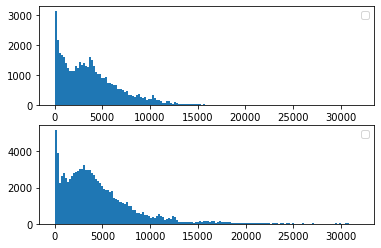

Marcado de entidades y ajuste de longitud de secuencias terminado.
Vocabulario pre-guardado cargado.
Embeddings pre-guardados cargados.
Secuencias pre-guardadas cargadas.
Cargando listas de interacciones fármaco-gen para entrenamiento.
Generando listas de ejemplos.
Listas de ejemplos generadas.
Procesando el ejemplo: 1/850
Procesando el ejemplo: 2/850
Procesando el ejemplo: 3/850
Procesando el ejemplo: 4/850
Procesando el ejemplo: 5/850
Procesando el ejemplo: 6/850
Procesando el ejemplo: 7/850
Procesando el ejemplo: 8/850
Procesando el ejemplo: 9/850
Procesando el ejemplo: 10/850
Procesando el ejemplo: 11/850
Procesando el ejemplo: 12/850
Procesando el ejemplo: 13/850
Procesando el ejemplo: 14/850
Procesando el ejemplo: 15/850
Procesando el ejemplo: 16/850
Procesando el ejemplo: 17/850
Procesando el ejemplo: 18/850
Procesando el ejemplo: 19/850
Procesando el ejemplo: 20/850
Procesando el ejemplo: 21/850
Procesando el ejemplo: 22/850
Procesando el ejemplo: 23/850
Procesando el ejemplo: 

No handles with labels found to put in legend.
No handles with labels found to put in legend.



Procesando el ejemplo: 850/850


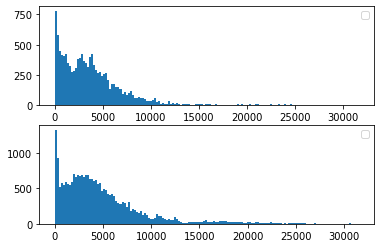

Marcado de entidades y ajuste de longitud de secuencias terminado.


In [0]:
import os
import numpy as np
import csv
import random
import math
from keras.preprocessing import text, sequence
from keras.utils import np_utils
import pickle
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
import h5py

# CONFIGURAR PARA LA CREACIÓN DE EJEMPLOS:

vocabulario_bool = False
embeddings_bool = False
dimension_embedding = 75
secuencias_bool = False
padtrunc_where = "post"
guardar_archivos = True

excluir_interacciones_lista = [] #"sin_interaccion"]
porcentaje_prueba = 0.2
maxima_longitud_ejemplos = 10000
cantidad_sin_interaccion = 1048


def cargar_ifg(etiquetas_archivo_ruta, # Archivo de etiquetas: pmid, gen, droga, interacción
               interacciones_lista_ruta, # Lista de etiquetas a considerar
               excluir_interacciones_lista,
               cantidad_sin_interaccion): # Lista de interacciones que no se cargarán
    # Carga de las interacciones a considerar en una lista
    interacciones_considerar = list()
    with open(interacciones_lista_ruta, encoding="utf8") as interacciones:
        for interaccion in interacciones:
            interacciones_considerar.append(interaccion.strip())
    # Carga de las interacciones fármaco-gen
    interacciones_lista = list()
    sin_interaccion_lista = list()
    with open(etiquetas_archivo_ruta, encoding="utf8") as etiquetas:
        lector_csv = csv.reader(etiquetas, delimiter=',', quoting=csv.QUOTE_ALL)
        for linea in lector_csv:
            if linea[3] not in excluir_interacciones_lista:
              if linea[3] not in interacciones_considerar:
                linea[3] = "other"
                interacciones_lista.append(linea)
              # elif linea[3] == "sin_interaccion":
              #   sin_interaccion_lista.append(linea)
              else:
                interacciones_lista.append(linea)
                
    # for linea in random.sample(sin_interaccion_lista, k=cantidad_sin_interaccion):
    #     interacciones_lista.append(linea)

    return interacciones_lista


def marcar_entidad_en_secuencia(secuencia_lista,
                                vocabulario,
                                ifg_balanceadas_lista,
                                top_palabras_frecuentes):

    for i in range(0, len(secuencia_lista), 1):
        print("Procesando el ejemplo: {}/{}".format(i+1,len(secuencia_lista)))
        # No hace más falta llamar al compactar, este algoritmo ya evita que queden repetidos secuenciales
        ejemplo = secuencia_lista[i]
        gen = ifg_balanceadas_lista[i][1]
        droga = ifg_balanceadas_lista[i][2]

        secuencia_gen = top_palabras_frecuentes+1
        secuencia_droga = top_palabras_frecuentes+2 
    
        ejemplo_reducido = list()
        for elemento in ejemplo:
            palabra = vocabulario.index_word[elemento]
            if palabra.startswith("xxx") and palabra.endswith("xxx"):
                if palabra == "xxx{}xxx".format(gen):
                    elemento = secuencia_gen
                elif palabra == "xxx{}xxx".format(droga):
                    elemento = secuencia_droga
                else:
                    elemento = 0 # anulo todos los otros
            ejemplo_reducido.append(elemento)

        secuencia_lista[i] = ejemplo_reducido

    return secuencia_lista


def crear_ejemplos(archivo_etiquetas_ruta,
                   excluir_interacciones_lista,
                   porcentaje_prueba,
                   maxima_longitud_ejemplos,
                   vocabulario_bool,
                   embeddings_bool,
                   secuencias_bool,
                   dimension_embedding,
                   x_salida, y_salida,
                   padtrunc_where="post", guardar=False):

    ''' Vocabulario '''
    if not porcentaje_prueba:
        porcentaje_prueba = 0.0
    top_palabras_frecuentes = 0
    vocabulario = text.Tokenizer()
    if vocabulario_bool: # Generar el vocabulario
        # Se cargan las publicaciones en un diccionario: publicaciones_dict[pmid] = contenido
        print("Cargando diccionario de publicaciones.")
        publicaciones_dict = dict()
        publicaciones_en_directorio = os.listdir(publicaciones_directorio)
        tot = len(publicaciones_en_directorio)
        print("Cantidad de archivos:", tot)
        for i, archivo in enumerate(publicaciones_en_directorio):
            pmid = archivo.split(".")[0]
            print("Leyendo {}/{}".format(i, tot))
            archivo_ruta = os.path.join(publicaciones_directorio, archivo)
            with open(archivo_ruta, encoding="utf8") as publicacion:
                texto = publicacion.read()
                publicaciones_dict[pmid] = texto
        print("Diccionario de publicaciones cargado.")

        # Se genera el vocabulario
        print("Generando vocabulario.")
        vocabulario.fit_on_texts(publicaciones_dict.values())
        with open(vocabulario_ruta, "wb") as handle: # Guardar vocabulario en disco
            pickle.dump(vocabulario, handle, protocol=pickle.HIGHEST_PROTOCOL)

        print("Vocabulario generado.")
    else: # Cargar vocabulario pre-guardado
        with open(vocabulario_ruta, "rb") as handle: # Cargar vocabulario desde el disco
            vocabulario = pickle.load(handle)

        # maxima_longitud_ejemplos = len(vocabulario.index_word)

        print("Vocabulario pre-guardado cargado.")
    
    top_palabras_frecuentes = len(vocabulario.word_index)
    secuencia_gen = top_palabras_frecuentes + 1
    vocabulario.index_word[secuencia_gen] = "<GEN>"
    vocabulario.word_index["<GEN>"] = secuencia_gen
    secuencia_droga = top_palabras_frecuentes + 2
    vocabulario.index_word[secuencia_droga] = "<DROGA>"
    vocabulario.word_index["<DROGA>"] = secuencia_droga
    #top_palabras_frecuentes += 2

    ''' Embeddings '''
    ###
    # Agregar un if para generar la matriz de embeddings de GloVe
    ###
    matriz_embeddings = 0
    if embeddings_bool: # Generar vectores de embedding
        print("Generando diccionario de embeddings.")
        embeddings_dict = dict()
        palabras_lista = list(vocabulario.word_index.keys())
        modelo_word2vec = Word2Vec([palabras_lista], size=dimension_embedding, min_count=1) # , workers=8

        gen_emb = np.zeros((1, dimension_embedding+2))
        gen_emb[0, dimension_embedding] = 1
        droga_emb = np.zeros((1, dimension_embedding+2))
        droga_emb[0, dimension_embedding+1] = 1
        for palabra, secuencia in vocabulario.word_index.items():
          if palabra == "<GEN>":
            embeddings_dict[palabra] = gen_emb
          elif palabra == "<DROGA>":
            embeddings_dict[palabra] = droga_emb
          else:
            embeddings_dict[palabra] = list(modelo_word2vec.wv[palabra]) + [0, 0]
        
        matriz_embeddings = np.zeros((len(vocabulario.word_index)+1, dimension_embedding+2))
        for i, palabra in enumerate(vocabulario.word_index.keys()):
          matriz_embeddings[i+1] = embeddings_dict[palabra]

        with open(matriz_embeddings_ruta, "wb") as handle:
          pickle.dump(matriz_embeddings, handle, protocol=pickle.HIGHEST_PROTOCOL)
        print("Diccionario de embeddings generado.")
    else: # Cargar vectores de embedding pre-guardados
        with open(matriz_embeddings_ruta, "rb") as handle:
          matriz_embeddings = pickle.load(handle)
        print("Embeddings pre-guardados cargados.")

    ''' Secuencias '''
    secuencias_dict = dict()
    if secuencias_bool: # Generar secuencias
        # Se convierten los ejemplos en secuencias de números
        print("Generando secuencias.")
        publicaciones_lista = list()
        publicaciones_pmids = list()
        for pmid, contenido in publicaciones_dict.items():
            publicaciones_pmids.append(pmid)
            publicaciones_lista.append(contenido)
        secuencias_lista = vocabulario.texts_to_sequences(publicaciones_lista)
        for i in range(0, len(publicaciones_pmids), 1):
            secuencias_dict[publicaciones_pmids[i]] = secuencias_lista[i]
        with open(secuencias_ruta, "wb") as handle: # Guardar vocabulario en disco
            pickle.dump(secuencias_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
        print("Secuencias generadas.")
    else: # Cargar secuencias pre-guardadas
        with open(secuencias_ruta, "rb") as handle: # Cargar vocabulario desde el disco
            secuencias_dict = pickle.load(handle)
        print("Secuencias pre-guardadas cargadas.")
        lista = list()
        for pmid, secuencia in secuencias_dict.items():
            lista.append(len(secuencia))

    ''' Generación particular de particiones '''
    ejemplos_x_entrenamiento_secuencia_ajustada_lista = list()
    ejemplos_y_entrenamiento_lista = list()
    if True:
        # One hot encoding de la salida
        interacciones_lista = list()
        interacciones_numeros_lista = list()
        with open(interacciones_lista_ruta) as interacciones:
            contador = 0
            for interaccion in interacciones:
                interacciones_lista.append(interaccion.strip())
                interacciones_numeros_lista.append(contador)
                contador += 1
        interacciones_numeros_lista = np_utils.to_categorical(interacciones_numeros_lista)
        interacciones_numeros_dict = dict()
        for i in range(0, len(interacciones_lista), 1):
            interacciones_numeros_dict[interacciones_lista[i]] = interacciones_numeros_lista[i]

        # Se cargan en dos lista las interacciones fármaco-gen para entrenamiento
        print("Cargando listas de interacciones fármaco-gen para entrenamiento.")
        ifg_entrenamiento = cargar_ifg(archivo_etiquetas_ruta,
                                       interacciones_lista_ruta,
                                       excluir_interacciones_lista,
                                       cantidad_sin_interaccion)

        # Se generan las listas de ejemplos
        print("Generando listas de ejemplos.")
        ejemplos_x_entrenamiento_lista = list()

        for i in range(0, len(ifg_entrenamiento), 1):
            secuencia = secuencias_dict[ifg_entrenamiento[i][0]]
            ejemplos_x_entrenamiento_lista.append(secuencia)
            ejemplos_y_entrenamiento_lista.append(interacciones_numeros_dict[ifg_entrenamiento[i][3]])
        print("Listas de ejemplos generadas.")

        # Se ajustan las secuencias a la longitud deseada
        ejemplos_x_entrenamiento_lista = marcar_entidad_en_secuencia(ejemplos_x_entrenamiento_lista,
                                                                     vocabulario,
                                                                     ifg_entrenamiento,
                                                                     top_palabras_frecuentes)

        ejemplos_x_entrenamiento_secuencia_lista = np.asarray(ejemplos_x_entrenamiento_lista)
        ejemplos_y_entrenamiento_lista = np.asarray(ejemplos_y_entrenamiento_lista)
        

        histograma(ejemplos_x_entrenamiento_secuencia_lista, secuencia_gen, secuencia_droga)

        ejemplos_x_entrenamiento_secuencia_ajustada_lista = sequence.pad_sequences(sequences=ejemplos_x_entrenamiento_secuencia_lista,
                                                                                   maxlen=maxima_longitud_ejemplos,
                                                                                   padding=padtrunc_where,
                                                                                   truncating=padtrunc_where)
        print("Marcado de entidades y ajuste de longitud de secuencias terminado.")

        
        x = ejemplos_x_entrenamiento_secuencia_ajustada_lista
        y = ejemplos_y_entrenamiento_lista
        # y_para_split = [e.tolist().index(1) for e in y]
        # x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = train_test_split(x, y, test_size=porcentaje_prueba, stratify=y_para_split) # stratify=y_para_split

        x_entrenamiento = x
        y_entrenamiento = y

        if guardar:
            # with h5py.File(x_entrenamiento_ruta, 'w') as f:
            #   x_entrenamiento = f.create_dataset("default", data=x_entrenamiento) 
            # with h5py.File(y_entrenamiento_ruta, 'w') as f:
            #   y_entrenamiento = f.create_dataset("default", data=y_entrenamiento) 
            # with h5py.File(x_prueba_ruta, 'w') as f:
            #   x_prueba = f.create_dataset("default", data=x_prueba) 
            # with h5py.File(y_prueba_ruta, 'w') as f:
            #   y_prueba = f.create_dataset("default", data=y_prueba) 

            with open(x_salida, "wb") as handle:
                pickle.dump(x_entrenamiento, handle, protocol=pickle.HIGHEST_PROTOCOL)
            with open(y_salida, "wb") as handle:
                pickle.dump(y_entrenamiento, handle, protocol=pickle.HIGHEST_PROTOCOL)
            # with open(x_prueba_ruta.format(padtrunc_where), "wb") as handle:
            #     pickle.dump(x_prueba, handle, protocol=pickle.HIGHEST_PROTOCOL)
            # with open(y_prueba_ruta, "wb") as handle:
            #     pickle.dump(y_prueba, handle, protocol=pickle.HIGHEST_PROTOCOL)


# genera ejemplos de entrenamiento:
crear_ejemplos(etiquetas_neural_networks_ruta,
               excluir_interacciones_lista,
               porcentaje_prueba,
               maxima_longitud_ejemplos,
               vocabulario_bool,
               embeddings_bool,
               secuencias_bool,
               dimension_embedding,
               x_entrenamiento_ruta, y_entrenamiento_ruta,
               padtrunc_where, guardar_archivos)

# genera ejemplos de prueba:
crear_ejemplos(etiquetas_neural_networks_prueba_ruta,
               excluir_interacciones_lista,
               porcentaje_prueba,
               maxima_longitud_ejemplos,
               vocabulario_bool,
               embeddings_bool,
               secuencias_bool,
               dimension_embedding,
               x_prueba_ruta, y_prueba_ruta,
               padtrunc_where, guardar_archivos)

# Carga del dataset, vocabulario y diccionario de embeddings.

In [0]:
import os
import pickle
import csv
import numpy as np
from keras.utils import np_utils
from collections import Counter
from sklearn.utils.class_weight import compute_class_weight




interacciones = cargar_interacciones(interacciones_lista_ruta)

with open(x_entrenamiento_ruta, "rb") as handle:
    x_entrenamiento = pickle.load(handle)
with open(y_entrenamiento_ruta, "rb") as handle:
    y_entrenamiento = pickle.load(handle)
with open(matriz_embeddings_ruta, "rb") as handle:
    matriz_embeddings = pickle.load(handle)



print("X:", len(x_entrenamiento), "Y:", len(y_entrenamiento))
x = []; y = []
for i in range(len(x_entrenamiento)):
    clase = y_entrenamiento[i]
    if clase not in interacciones:
        clase = "other"
    x.append(x_entrenamiento[i])
    y.append(clase)


interacciones_pesos_dict = generar_pesos_clases(y)
NUM_CLASES = len(interacciones_pesos_dict)

categorical = np_utils.to_categorical(range(len(interacciones)))
onehot = {}
for i, interaccion in enumerate(interacciones):
    onehot[interaccion] = categorical[i]

print(onehot)
x_entrenamiento = np.asarray(x)
y_entrenamiento = np.asarray([onehot[clase] for clase in y])

print("Cantidad de ejemplos cargados:", len(x_entrenamiento), len(y_entrenamiento))
print("Cantidad de clases:", NUM_CLASES)
print("Pesos por clase:", interacciones_pesos_dict)
print("Dimensión de la matriz de embeddings: {}".format(matriz_embeddings.shape))


X: 3400 Y: 3400


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Cantidad sin interacción: 0
Cantidad inhibitor: 0
{'other': 1.0}


KeyError: ignored

# OLD CARGAR

In [0]:
import os
import pickle
import csv
import numpy as np
from collections import Counter
from sklearn.utils.class_weight import compute_class_weight


with open(x_entrenamiento_ruta, "rb") as handle:
  x_entrenamiento = pickle.load(handle)
with open(y_entrenamiento_ruta, "rb") as handle:
  y_entrenamiento = pickle.load(handle)
# with open(x_prueba_ruta, "rb") as handle:
#   x_prueba = pickle.load(handle)
# with open(y_prueba_ruta, "rb") as handle:
#   y_prueba = pickle.load(handle)
# with open(vocabulario_ruta, "rb") as handle:
#   vocabulario = pickle.load(handle)
with open(matriz_embeddings_ruta, "rb") as handle:
  matriz_embeddings = pickle.load(handle)


def generar_pesos_clases(etiquetas_neural_networks_ruta,
                         excluir_interacciones_lista,
                         interacciones_considerar):
  
  interacciones_dict = dict() # interacciones_dict[#] = "interacción"
  for i in range(0, len(interacciones_considerar), 1):
    interacciones_dict[i] = interacciones_considerar[i]

  # print(y_entrenamiento[0])
  # print(interacciones_dict[y_entrenamiento[0].tolist().index(1)])

  clases_lista = list()
  for one_hot in y_entrenamiento.tolist():
    clases_lista.append(interacciones_dict[list(one_hot).index(1)])

  interaccion_por_etiqueta = list()
  with open(etiquetas_neural_networks_ruta, encoding="utf8") as etiquetas:
      lector_csv = csv.reader(etiquetas, delimiter=',', quoting=csv.QUOTE_ALL)
      for linea in lector_csv:
          if linea[3] not in excluir_interacciones_lista:
              if linea[3] not in interacciones_considerar:
                  interaccion_por_etiqueta.append("other")
              else:
                  interaccion_por_etiqueta.append(linea[3])

  # print(interaccion_por_etiqueta[0])

  # interacciones_cantidad_dict = Counter(interaccion_por_etiqueta) # Clases y cantidad de ejemplos por clases ordenados de mayor a menor
  # interacciones_cantidad_dict["sin_interaccion"] = cantidad_ejemplos_sin_interaccion
  # print("Contador de interacciones:")
  # print(interacciones_cantidad_dict)
  # cantidad_elementos_mayor_clase = max(interacciones_cantidad_dict.values())
  interacciones_pesos_dict = dict()
  clases_unicas = np.unique(interaccion_por_etiqueta)
  pesos = compute_class_weight("balanced", clases_unicas, clases_lista) # interaccion_por_etiqueta
  pesos = dict(zip(clases_unicas, pesos))
  for i, interaccion in enumerate(interacciones_considerar):
      if interaccion not in excluir_interacciones_lista:
          interacciones_pesos_dict[i] = pesos[interaccion]
  return interacciones_pesos_dict


interacciones_lista = cargar_interacciones(interacciones_lista_ruta)
interacciones_pesos_dict = generar_pesos_clases(etiquetas_neural_networks_ruta, [], interacciones_lista)


print("Cantidad de ejemplos cargados:", len(x_entrenamiento), len(y_entrenamiento))
print("Cantidad de clases:", len(interacciones_pesos_dict))
print("Pesos por clase:")
print(interacciones_pesos_dict)
print("Dimensión de la matriz de embeddings: {}".format(matriz_embeddings.shape))
print("Embedding para la secuencia 0: {}".format(matriz_embeddings[0]))
# print("x_entrenamiento: {}".format(x_entrenamiento))
# print("y_entrenamiento: {}".format(y_entrenamiento))
# print("x_prueba: {}".format(x_prueba))
# print("y_prueba: {}".format(y_prueba))

Cantidad de ejemplos cargados: 3400 3400
Cantidad de clases: 17
Pesos por clase:
{0: 0.1949317738791423, 1: 0.2386634844868735, 2: 0.38022813688212925, 3: 0.3853564547206166, 4: 1.550387596899225, 5: 3.0303030303030303, 6: 4.3478260869565215, 7: 4.878048780487805, 8: 6.896551724137931, 9: 9.090909090909092, 10: 9.523809523809524, 11: 10.0, 12: 10.0, 13: 11.11111111111111, 14: 13.333333333333334, 15: 12.5, 16: 4.166666666666667}
Dimensión de la matriz de embeddings: (506332, 52)
Embedding para la secuencia 0: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


# Variables.

In [0]:
from keras.optimizers import Adam

# Variables obtenidas de los ejemplos
cantidad_ejemplos_total = x_entrenamiento.shape[0]
maxima_longitud_ejemplos = x_entrenamiento.shape[1]
cantidad_ejemplos_entrenamiento = 0
cantidad_ejemplos_validacion = 0
# cantidad_ejemplos_prueba = x_prueba.shape[0]
cantidad_clases = y_entrenamiento.shape[1]

''' Parámetros del modelo '''
# PORCENTAJE_VALIDACION = 0.2
PARTICIONES = 3
CANTIDAD_EPOCAS = 40
PORCENTAJE_DROPEO = 0.4
# Perceptrón
CAPAS_OCULTAS = 1
NEURONAS_SALIDA = cantidad_clases
ACTIVACION_SALIDA = "softmax"
NEURONAS_OCULTAS = NEURONAS_SALIDA*3
ACTIVACION_OCULTA = "relu"
# Embeddings
DIMENSION_EMBEDDINGS = 52
# Convolución
CANTIDAD_FILTROS = 100

DIMENSION_KERNEL = list()
for i in range(1, 10, 2):
  DIMENSION_KERNEL.append(i)
DIMENSION_KERNEL = tuple(DIMENSION_KERNEL)
print(DIMENSION_KERNEL)

UNIDADES_LSTM = 64

# Parámetros de compilación
OPTIMIZADOR = "adam"
FUNCION_ERROR = "categorical_crossentropy"
METRICA = "categorical_accuracy"
# Parámetros de entrenamiento
DIMENSION_BATCH = 32

Using TensorFlow backend.


(1, 3, 5, 7, 9)


# CNN.











Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:85: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`




Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 10000)        0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 10000, 52)    26329264    input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 10000, 100)   5200        embedding_1[0][0]                
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 10000, 100)   15600       embedding_1[0][0]                
__________________________________________________________________________________________

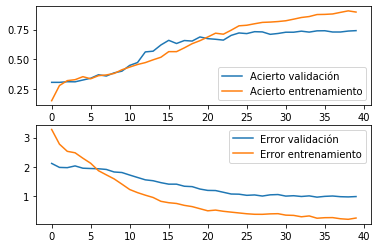

1134/1134 [==============================] - 1s 1ms/step
Acierto en el entrenamiento: 96.65%
Acierto en la validación: 74.16%
	Áreas bajo la curva ROC para las distintas clases en la partición 1:
		Media y desvío AUC ROC de la clase sin_interaccion: 0.9782400023628094

		Media y desvío AUC ROC de la clase inhibitor: 0.9209373493470834

		Media y desvío AUC ROC de la clase agonist: 0.9174564670715506

		Media y desvío AUC ROC de la clase antagonist: 0.8553529861115289

		Media y desvío AUC ROC de la clase cofactor: 0.9821584635388911

		Media y desvío AUC ROC de la clase binder: 0.8272972531066057

		Media y desvío AUC ROC de la clase inducer: 0.8682752457551385

		Media y desvío AUC ROC de la clase antibody: 0.9869260204081632

		Media y desvío AUC ROC de la clase partial agonist: 0.9028914590747331

		Media y desvío AUC ROC de la clase ligand: 0.9670427177082014

		Media y desvío AUC ROC de la clase product of: 0.7975662314615286

		Media y desvío AUC ROC de la clase multitarget: 0.99

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:85: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 10000)        0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 10000, 52)    26329264    input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 10000, 100)   5200        embedding_1[0][0]                
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 10000, 100)   15600       embedding_1[0][0]                
____________________________________________________________________________________________

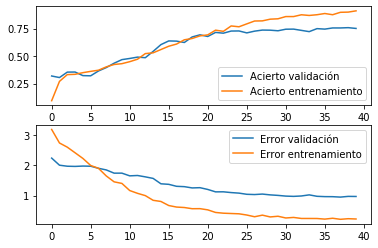

1133/1133 [==============================] - 1s 1ms/step
Acierto en el entrenamiento: 97.22%
Acierto en la validación: 75.90%
	Áreas bajo la curva ROC para las distintas clases en la partición 2:
		Media y desvío AUC ROC de la clase sin_interaccion: 0.9763383384715476

		Media y desvío AUC ROC de la clase inhibitor: 0.9267564059621504

		Media y desvío AUC ROC de la clase agonist: 0.9303757828810022

		Media y desvío AUC ROC de la clase antagonist: 0.8829389450867052

		Media y desvío AUC ROC de la clase cofactor: 0.9758054192447194

		Media y desvío AUC ROC de la clase binder: 0.8584813026757221

		Media y desvío AUC ROC de la clase inducer: 0.9403697078115681

		Media y desvío AUC ROC de la clase antibody: 0.9917656070471083

		Media y desvío AUC ROC de la clase partial agonist: 0.9034283170080143

		Media y desvío AUC ROC de la clase ligand: 0.8595534128393808

		Media y desvío AUC ROC de la clase product of: 0.8222532352194875

		Media y desvío AUC ROC de la clase multitarget: 0.99

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:85: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 10000)        0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 10000, 52)    26329264    input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 10000, 100)   5200        embedding_1[0][0]                
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 10000, 100)   15600       embedding_1[0][0]                
____________________________________________________________________________________________

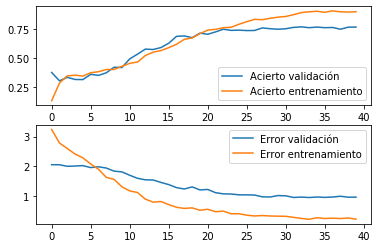

1133/1133 [==============================] - 1s 1ms/step
Acierto en el entrenamiento: 96.38%
Acierto en la validación: 76.70%
	Áreas bajo la curva ROC para las distintas clases en la partición 3:
		Media y desvío AUC ROC de la clase sin_interaccion: 0.9628070914750002

		Media y desvío AUC ROC de la clase inhibitor: 0.9314652531204619

		Media y desvío AUC ROC de la clase agonist: 0.9373516254100804

		Media y desvío AUC ROC de la clase antagonist: 0.8766678709055877

		Media y desvío AUC ROC de la clase cofactor: 0.9809686366545766

		Media y desvío AUC ROC de la clase binder: 0.8730873087308731

		Media y desvío AUC ROC de la clase inducer: 0.8809870188003581

		Media y desvío AUC ROC de la clase antibody: 0.9916208791208792

		Media y desvío AUC ROC de la clase partial agonist: 0.9800316330565442

		Media y desvío AUC ROC de la clase ligand: 0.9531111111111111

		Media y desvío AUC ROC de la clase product of: 0.8107079421466633

		Media y desvío AUC ROC de la clase multitarget: 0.91

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals # Compatibilidad entre Python 2 y 3

from keras.models import Model, load_model
from keras.layers import Input, Embedding, Conv1D, BatchNormalization, Activation, GlobalMaxPooling1D, Dropout, concatenate, Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.optimizers import Adam
from keras.utils import plot_model
from keras import backend as K

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

import numpy as np
import matplotlib.pyplot as pplt
import statistics
import os

# print("Generando matriz de embeddings.")
# embeddings_matriz = np.zeros((top_palabras_frecuentes, dimension_embedding))
# for palabra, secuencia in vocabulario.word_index.items():
#     embedding_vector = embeddings_dict.wv[palabra]
#     if embedding_vector is not None:
#         embeddings_matriz[i] = embedding_vector
# print("Matriz de embeddings generada.")

areas_roc = list()
resultados_finales = list()

kfold = StratifiedKFold(n_splits=PARTICIONES, shuffle=True)

y_para_split = [y.tolist().index(1) for y in y_entrenamiento]
i = 0
for train_index, val_index in kfold.split(x_entrenamiento, y_para_split):
  i += 1
  cantidad_ejemplos_entrenamiento = len(train_index)
  cantidad_ejemplos_validacion = len(val_index)

  ''' Arquitectura del modelo '''
  formato_entrada = (maxima_longitud_ejemplos,)

  # Capa de entrada
  entrada = Input(formato_entrada)

  # Capa de embedding
  embedding = Embedding(input_dim=matriz_embeddings.shape[0],
                        output_dim=DIMENSION_EMBEDDINGS,
                        input_length=maxima_longitud_ejemplos,
                        weights=[matriz_embeddings])(entrada)
                        # trainable=True)(entrada)

  # Capas de convolución y pooling
  capas = list()
  for j in range(0, len(DIMENSION_KERNEL), 1):
    convolucion = Conv1D(filters=CANTIDAD_FILTROS,
                        kernel_size=DIMENSION_KERNEL[j],
                        padding='same',
                        use_bias=False)(embedding)
    batch_normalization = BatchNormalization()(convolucion)
    activacion = Activation(ACTIVACION_OCULTA)(batch_normalization)
    pooling = GlobalMaxPooling1D()(activacion)
    dropout = Dropout(PORCENTAJE_DROPEO)(pooling)
    capas.append(dropout)

  # Concatenación de las convoluciones y poolings
  if len(DIMENSION_KERNEL) > 1:
    convoluciones_poolings = concatenate(capas)
  else:
    convoluciones_poolings = capas[0]
  
  # Capas ocultas
  ultima_capa = 0
  dense = 0
  for j in range(0, CAPAS_OCULTAS, 1):
    if j == 0:
      dense = Dense(NEURONAS_OCULTAS, use_bias=False)(convoluciones_poolings)
    else:
      dense = Dense(NEURONAS_OCULTAS, use_bias=False)(ultima_capa)
    batch_normalization = BatchNormalization()(dense)
    activacion = Activation(ACTIVACION_OCULTA)(batch_normalization)
    dropout = Dropout(PORCENTAJE_DROPEO)(activacion)
    ultima_capa = dropout
  
  # Capa de salida
  dense3 = Dense(NEURONAS_SALIDA, activation=ACTIVACION_SALIDA)(ultima_capa)
  modelo_cnn = Model(input=entrada, output=dense3)

  # Se guarda la arquitectura del modelo en un archivo de imagen
  plot_model(modelo_cnn, to_file=modelo_arquitectura_ruta)
  ''' Arquitectura del modelo '''

  modelo_cnn.compile(optimizer=OPTIMIZADOR,
                      loss=FUNCION_ERROR,
                      metrics=[METRICA])

  # Callbacks
  bajar_velocidad = ReduceLROnPlateau(monitor='val_loss',
                                      factor=0.1,
                                      patience=2,
                                      verbose=1,
                                      mode='auto',
                                      min_delta=0.0001,
                                      cooldown=0,
                                      min_lr=0)

  parada_temprana_val_loss = EarlyStopping(monitor='val_loss',
                                           patience=4,
                                           mode='auto',
                                           verbose=1)                                                     

  modelo_punto_de_control = ModelCheckpoint(modelo_guardado_ruta.format(i),
                                            monitor="val_categorical_accuracy",
                                            mode="auto",
                                            save_best_only=True,
                                            verbose=1)

  modelo_cnn.summary() # Detalles del modelo

  print("Particion: {}/{}".format(i, PARTICIONES))

  registro = modelo_cnn.fit(x=x_entrenamiento[train_index],
                            y=y_entrenamiento[train_index],
                            epochs=CANTIDAD_EPOCAS,
                            # callbacks=[parada_temprana_val_loss, bajar_velocidad, modelo_punto_de_control],
                            callbacks=[modelo_punto_de_control],
                            validation_data=(x_entrenamiento[val_index], y_entrenamiento[val_index]),
                            verbose=1,
                            class_weight=interacciones_pesos_dict,
                            batch_size=DIMENSION_BATCH)

  pplt.figure()
  pplt.subplot(2,1,1)
  pplt.plot(registro.history["val_categorical_accuracy"], label="Acierto validación")
  pplt.plot(registro.history["categorical_accuracy"], label="Acierto entrenamiento")
  pplt.legend()
  
  pplt.subplot(2,1,2)
  pplt.plot(registro.history["val_loss"], label="Error validación")
  pplt.plot(registro.history["loss"], label="Error entrenamiento")
  pplt.legend()
  
  analisis_entrenamiento_ruta = os.path.join(pfc_datos_google_drive_ruta, "analisis_entrenamiento_{}.png".format(i))
  pplt.savefig(analisis_entrenamiento_ruta)
  pplt.show()

  # pplt.plot(registro.history["loss"], label="Error entrenamiento")
  # pplt.plot(registro.history["val_loss"], label="Error validación")
  # pplt.plot(registro.history["accuracy"], label="Acierto entrenamiento")
  # pplt.plot(registro.history["val_accuracy"], label="Acierto validación")
  # pplt.legend()
  # pplt.show()

  # del modelo_cnn
  modelo_cnn = load_model(modelo_guardado_ruta.format(i))

  _, acierto_entrenamiento = modelo_cnn.evaluate(x_entrenamiento[train_index], y_entrenamiento[train_index])
  _, acierto_validacion = modelo_cnn.evaluate(x_entrenamiento[val_index], y_entrenamiento[val_index])
  resultados_finales.append([acierto_entrenamiento, acierto_validacion])

  print("Acierto en el entrenamiento: {}%".format("%.2f" % (acierto_entrenamiento*100)))
  print("Acierto en la validación: {}%".format("%.2f" % (acierto_validacion*100)))

  y_prediccion = modelo_cnn.predict(x_entrenamiento[val_index])
  razon_falsos_positivos = dict()
  razon_verdaderos_positivos = dict()
  area_bajo_curva_roc = dict()
  for j in range(cantidad_clases):
      razon_falsos_positivos[j], razon_verdaderos_positivos[j], _ = roc_curve(y_entrenamiento[val_index][:, j], y_prediccion[:, j])
      area_bajo_curva_roc[j] = auc(razon_falsos_positivos[j], razon_verdaderos_positivos[j])
  areas_roc.append(area_bajo_curva_roc)

  print("\tÁreas bajo la curva ROC para las distintas clases en la partición {}:".format(i))
  for j in range(0, len(area_bajo_curva_roc), 1):
      print("\t\tMedia y desvío AUC ROC de la clase {}: {}\n".format(interacciones_lista[j], area_bajo_curva_roc[j]))

  # Limpieza de memoria
  # del modelo_cnn
  # del registro
  K.clear_session()
# Fin del for de repeticiones

resultados_finales = np.asarray(resultados_finales)

# Medias
promedio_acierto_entrenamiento = statistics.mean(resultados_finales[:, 0])
promedio_acierto_validacion = statistics.mean(resultados_finales[:, 1])
# promedio_acierto_prueba = statistics.mean(resultados_finales[:, 2])

# Desvíos estándar
desvio_acierto_entrenamiento = statistics.stdev(resultados_finales[:, 0])
desvio_acierto_validacion = statistics.stdev(resultados_finales[:, 1])
# desvio_acierto_prueba = statistics.stdev(resultados_finales[:, 2])

# AUC's ROC
promedios_desvios_auc_roc = dict()
for i in range(0, cantidad_clases, 1):
    lista = list()
    for j in range(0, PARTICIONES, 1):
        area = areas_roc[j][i]
        lista.append(area)
    media = statistics.mean(lista)
    desvio = statistics.stdev(lista)
    promedios_desvios_auc_roc[i] = [media, desvio]


mejor = -1
mejor_acierto = -1
for k in range(PARTICIONES):
    model = load_model(modelo_guardado_ruta.format(k+1))
    _, acierto = model.evaluate(x_entrenamiento, y_entrenamiento)
    if acierto > mejor_acierto:
        mejor_acierto = acierto
        mejor = k

os.rename(modelo_guardado_ruta.format(mejor), modelo_guardado_ruta.format("final"))

# RNN.

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 102)          51645864  
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               64128     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 17)                2193      
_________________________________________________________________
activation_2 (Activation)    (None, 17)                0         
Total params: 51,712,185
Trainable params: 51,712,185
Non-trainable params: 0
_________________________________________________________________
Particion: 1/3
Train on 2266 samples, validate on 1134 samples
Epoch 1/40
2266/2266 [=======================

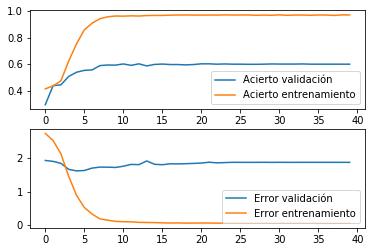

OSError: ignored

In [0]:
from keras.models import Sequential, load_model
from keras.layers import Embedding, Activation, Dropout, Dense, GRU, LSTM, Bidirectional
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.optimizers import Adam
from keras.utils import plot_model
from keras import backend as K

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

import numpy as np
import matplotlib.pyplot as pplt
import statistics

areas_roc = list()
resultados_finales = list()

kfold = StratifiedKFold(n_splits=PARTICIONES, shuffle=True)

y_para_split = [y.tolist().index(1) for y in y_entrenamiento]
i = 0
for train_index, val_index in kfold.split(x_entrenamiento, y_para_split):
    i += 1

    model = Sequential()
    model.add(Embedding(input_dim=matriz_embeddings.shape[0],
                        output_dim=DIMENSION_EMBEDDINGS,
                        input_length=maxima_longitud_ejemplos,
                        weights=[matriz_embeddings]))
    # model.add(Dropout(0.1))
    # model.add(Bidirectional(LSTM(64)))
    # model.add(LSTM(units=UNIDADES_LSTM, dropout=PORCENTAJE_DROPEO))
    model.add(Bidirectional(GRU(units=UNIDADES_LSTM)))
    model.add(Dropout(PORCENTAJE_DROPEO))
    model.add(Dense(NEURONAS_SALIDA))
    model.add(Activation(ACTIVACION_SALIDA))
    model.compile(optimizer=OPTIMIZADOR, loss=FUNCION_ERROR, metrics=[METRICA])
    model.summary()

    # Se guarda la arquitectura del modelo en un archivo de imagen
    plot_model(model, to_file=modelo_rnn_arquitectura_ruta.format(i))

    # Callbacks
    bajar_velocidad = ReduceLROnPlateau(monitor='val_loss',
                                        factor=0.1,
                                        patience=10,
                                        verbose=1,
                                        mode='auto',
                                        min_delta=0.0001,
                                        cooldown=0,
                                        min_lr=0)

    parada_temprana_val_loss = EarlyStopping(monitor='val_loss',
                                            patience=20,
                                            mode='auto',
                                            verbose=1)                                                     

    modelo_punto_de_control = ModelCheckpoint(modelo_guardado_ruta.format(i),
                                              monitor="val_categorical_accuracy",
                                              mode="auto",
                                              save_best_only=True,
                                              verbose=1)
    
    print("Particion: {}/{}".format(i, PARTICIONES))

    registro = model.fit(x=x_entrenamiento[train_index],
                         y=y_entrenamiento[train_index],
                         epochs=CANTIDAD_EPOCAS,
                         callbacks=[bajar_velocidad, modelo_punto_de_control],
                         validation_data=(x_entrenamiento[val_index], y_entrenamiento[val_index]),
                         verbose=1,
                         class_weight=interacciones_pesos_dict,
                         batch_size=DIMENSION_BATCH)


    pplt.figure()
    pplt.subplot(2,1,1)
    pplt.plot(registro.history["val_categorical_accuracy"], label="Acierto validación")
    pplt.plot(registro.history["categorical_accuracy"], label="Acierto entrenamiento")
    pplt.legend()
    
    pplt.subplot(2,1,2)
    pplt.plot(registro.history["val_loss"], label="Error validación")
    pplt.plot(registro.history["loss"], label="Error entrenamiento")
    pplt.legend()
    
    analisis_entrenamiento_ruta = os.path.join(pfc_datos_google_drive_ruta, "analisis_entrenamiento_{}.png".format(i))
    pplt.savefig(analisis_entrenamiento_ruta)
    pplt.show()

    model = load_model(modelo_rnn_guardado_ruta.format(i))

    _, acierto_entrenamiento = model.evaluate(x_entrenamiento[train_index], y_entrenamiento[train_index])
    _, acierto_validacion = model.evaluate(x_entrenamiento[val_index], y_entrenamiento[val_index])
    resultados_finales.append([acierto_entrenamiento, acierto_validacion])

    print("Acierto en el entrenamiento: {}%".format("%.2f" % (acierto_entrenamiento*100)))
    print("Acierto en la validación: {}%".format("%.2f" % (acierto_validacion*100)))

    y_prediccion = model.predict(x_entrenamiento[val_index])
    razon_falsos_positivos = dict()
    razon_verdaderos_positivos = dict()
    area_bajo_curva_roc = dict()
    for j in range(NEURONAS_SALIDA):
        razon_falsos_positivos[j], razon_verdaderos_positivos[j], _ = roc_curve(y_entrenamiento[val_index][:, j], y_prediccion[:, j])
        area_bajo_curva_roc[j] = auc(razon_falsos_positivos[j], razon_verdaderos_positivos[j])
    areas_roc.append(area_bajo_curva_roc)

    print("\tÁreas bajo la curva ROC para las distintas clases en la partición {}:".format(i))
    for j in range(0, len(area_bajo_curva_roc), 1):
        print("\t\tMedia y desvío AUC ROC de la clase {}: {}\n".format(interacciones_lista[j], area_bajo_curva_roc[j]))

    # Limpieza de memoria
    del model
    del registro
    K.clear_session()
    # Fin del for de repeticiones

resultados_finales = np.asarray(resultados_finales)

# Medias
promedio_acierto_entrenamiento = statistics.mean(resultados_finales[:, 0])
promedio_acierto_validacion = statistics.mean(resultados_finales[:, 1])
# promedio_acierto_prueba = statistics.mean(resultados_finales[:, 2])

# Desvíos estándar
desvio_acierto_entrenamiento = statistics.stdev(resultados_finales[:, 0])
desvio_acierto_validacion = statistics.stdev(resultados_finales[:, 1])
# desvio_acierto_prueba = statistics.stdev(resultados_finales[:, 2])

# AUC's ROC
promedios_desvios_auc_roc = dict()
for i in range(0, NEURONAS_SALIDA, 1):
    lista = list()
    for j in range(0, PARTICIONES, 1):
        area = areas_roc[j][i]
        lista.append(area)
    media = statistics.mean(lista)
    desvio = statistics.stdev(lista)
    promedios_desvios_auc_roc[i] = [media, desvio]


mejor = -1
mejor_acierto = -1
for k in range(PARTICIONES):
    model = load_model(modelo_rnn_guardado_ruta.format(k))
    _, acierto = model.evaluate(x_entrenamiento, y_entrenamiento)
    if acierto > mejor_acierto:
        mejor_acierto = acierto
        mejor = k

os.rename(modelo_rnn_guardado_ruta.format(mejor), modelo_rnn_guardado_ruta.format("final"))


# Gráficos.

NameError: ignored

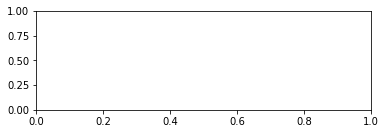

In [0]:
import matplotlib.pyplot as pplt
import os

pplt.figure()
pplt.subplot(2,1,1)
pplt.plot(registro.history["val_categorical_accuracy"], label="Acierto validación")
pplt.plot(registro.history["categorical_accuracy"], label="Acierto entrenamiento")
# aciertos_ruta = os.path.join(pfc_datos_google_drive_ruta, "aciertos.png")
pplt.legend()
# pplt.savefig(aciertos_ruta)
# pplt.show()

# pplt.figure()
pplt.subplot(2,1,2)
pplt.plot(registro.history["val_loss"], label="Error validación")
pplt.plot(registro.history["loss"], label="Error entrenamiento")
# errores_ruta = os.path.join(pfc_datos_google_drive_ruta, "errores.png")
pplt.legend()
analisis_entrenamiento_ruta = os.path.join(pfc_datos_google_drive_ruta, "analisis_entrenamiento_sinsin_20000.png")
pplt.savefig(analisis_entrenamiento_ruta)
pplt.show()

# Limpiar memoria

In [0]:
from keras import backend as K

K.clear_session()

# Detalles de ejecución.

In [0]:
print("Características de los datos de entrada:")
# print("\tCantidad de ejemplos para entrenamiento: {} ({}%)".format(cantidad_ejemplos_entrenamiento, (1-PORCENTAJE_VALIDACION)*100))
# print("\tCantidad de ejemplos para validación: {} ({}%)".format(cantidad_ejemplos_validacion, PORCENTAJE_VALIDACION*100))
# print("\tCantidad de ejemplos utilizados para probar: {}".format(cantidad_ejemplos_prueba))
print("\tLongitud de los ejemplos: {}".format(maxima_longitud_ejemplos))

print("Parámetros:")
print("\tCantidad de particiones: {}".format(PARTICIONES))
print("\tCantidad de épocas: {}".format(CANTIDAD_EPOCAS))
print("\tDropout: {}".format(PORCENTAJE_DROPEO))
print("\tDimension de los embeddings: {}".format(DIMENSION_EMBEDDINGS))
print("\tDimensión(es) de kernel(s): {}".format(DIMENSION_KERNEL))
print("\tCantidad de kernels por tipo: {}".format(CANTIDAD_FILTROS))
print("\tCantidad de capas ocultas: {}".format(CAPAS_OCULTAS))
print("\tCantidad de neuronas en la capa(s) oculta(s): {}".format(NEURONAS_OCULTAS))
print("\tActivación en la(s) capa(s) oculta(s): {}".format(ACTIVACION_OCULTA))
print("\tCantidad de neuronas en la capa de salida: {}".format(NEURONAS_SALIDA))
print("\tActivación en la capa de salida: {}".format(ACTIVACION_SALIDA))
print("\tOptimizador: {}".format(OPTIMIZADOR))
print("\tFunción de error: {}".format(FUNCION_ERROR))
print("\tMétrica: {}".format(METRICA))
print("\tDimensión batch: {}".format(DIMENSION_BATCH))

print("Resultados del entrenamiento:")
print("\tAcierto en el entrenamiento [media, desvío]: [{}% / {}%]".format("%.2f" % (promedio_acierto_entrenamiento*100), "%.2f" % (100*desvio_acierto_entrenamiento)))
print("\tAcierto en el validación [media, desvío]: [{}% / {}%]".format("%.2f" % (promedio_acierto_validacion*100), "%.2f" % (100*desvio_acierto_validacion)))
print("\tÁreas bajo la curva ROC para las distintas clases:")
for i in range(0, len(promedios_desvios_auc_roc), 1):
    print("\t\tMedia y desvío AUC ROC de la clase {}: {}\n".format(interacciones_lista[i], promedios_desvios_auc_roc[i]))

Características de los datos de entrada:
	Longitud de los ejemplos: 10000
Parámetros:
	Cantidad de particiones: 3
	Cantidad de épocas: 40
	Dropout: 0.4
	Dimension de los embeddings: 52
	Dimensión(es) de kernel(s): (1, 3, 5, 7, 9)
	Cantidad de kernels por tipo: 100
	Cantidad de capas ocultas: 1
	Cantidad de neuronas en la capa(s) oculta(s): 51
	Activación en la(s) capa(s) oculta(s): relu
	Cantidad de neuronas en la capa de salida: 17
	Activación en la capa de salida: softmax
	Optimizador: adam
	Función de error: categorical_crossentropy
	Métrica: categorical_accuracy
	Dimensión batch: 32
Resultados del entrenamiento:
	Acierto en el entrenamiento [media, desvío]: [96.75% / 0.43%]
	Acierto en el validación [media, desvío]: [75.59% / 1.30%]
	Áreas bajo la curva ROC para las distintas clases:
		Media y desvío AUC ROC de la clase sin_interaccion: [0.9724618107697858, 0.008415122392732038]

		Media y desvío AUC ROC de la clase inhibitor: [0.9263863361432318, 0.005273699196819559]

		Media y d

# Evaluación.

In [0]:
import pickle

mejor = -1
mejor_acierto = -1
for k in range(PARTICIONES):
    k += 1
    model = load_model(modelo_guardado_ruta.format(k))
    _, acierto = model.evaluate(x_entrenamiento, y_entrenamiento)
    if acierto > mejor_acierto:
        mejor_acierto = acierto
        mejor = k

os.rename(modelo_guardado_ruta.format(mejor), modelo_guardado_ruta.format("final"))

cnn_ruta = modelo_guardado_ruta.format("final")
rnn_ruta = modelo_rnn_guardado_ruta.format("final")

MODELO_RUTA = cnn_ruta

with open(x_prueba_ruta, "rb") as handle:
    x_prueba = pickle.load(handle)
with open(y_prueba_ruta, "rb") as handle:
    y_prueba = pickle.load(handle)

modelo = load_model(MODELO_RUTA)
error, acierto = model.evaluate(x_prueba, y_prueba)


print("Acierto en datos de prueba:", acierto)
print("Error en datos de prueba:", error)

850/850 [==============================] - 1s 1ms/step
Acierto en datos de prueba: 0.7576470591040219
Error en datos de prueba: 0.9675041193120619
